In [1]:
%matplotlib notebook
%pip install pydicom

import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [2]:
bbox = pd.read_csv('../CSVs/bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


## Step 1: 
Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function

In [3]:
dcm = pydicom.dcmread('../Images/dicom_00023075_033.dcm')

In [10]:
int(dcm.PatientAge) > 20 and int(dcm.PatientAge) < 80

True

## Step 2: 
Visualize the image using plt.imshow

<IPython.core.display.Javascript object>


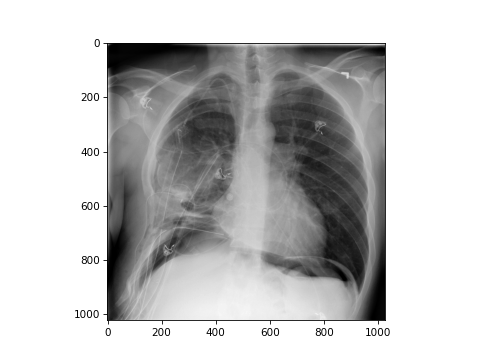

In [7]:
plt.imshow(dcm.pixel_array,cmap='gray')

## Step 3: 
plot a histogram of the image pixel intensity values

<IPython.core.display.Javascript object>


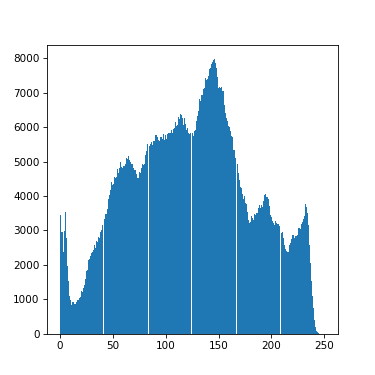

(array([3.455e+03, 2.969e+03, 2.961e+03, 2.387e+03, 2.990e+03, 3.522e+03,
        2.789e+03, 1.972e+03, 1.539e+03, 1.108e+03, 9.850e+02, 8.390e+02,
        9.200e+02, 8.530e+02, 8.690e+02, 9.220e+02, 9.840e+02, 9.930e+02,
        1.031e+03, 1.071e+03, 1.255e+03, 1.202e+03, 1.335e+03, 1.412e+03,
        1.592e+03, 1.835e+03, 1.862e+03, 2.141e+03, 2.182e+03, 2.248e+03,
        2.357e+03, 2.380e+03, 2.433e+03, 2.570e+03, 2.504e+03, 2.684e+03,
        2.679e+03, 2.814e+03, 2.777e+03, 2.970e+03, 3.013e+03, 3.145e+03,
        0.000e+00, 3.320e+03, 3.488e+03, 3.615e+03, 3.928e+03, 4.042e+03,
        4.177e+03, 4.408e+03, 4.334e+03, 4.363e+03, 4.550e+03, 4.525e+03,
        4.557e+03, 4.777e+03, 4.673e+03, 4.804e+03, 4.987e+03, 4.852e+03,
        4.824e+03, 4.876e+03, 4.877e+03, 4.940e+03, 5.113e+03, 5.074e+03,
        5.173e+03, 5.038e+03, 4.991e+03, 4.918e+03, 4.938e+03, 4.806e+03,
        4.755e+03, 4.764e+03, 4.647e+03, 4.530e+03, 4.712e+03, 4.671e+03,
        4.816e+03, 4.924e+03, 4.898e+0

In [8]:
plt.figure(figsize=(5,5))
plt.hist(dcm.pixel_array.ravel(), bins = 256)

Note the peak at zero, which are background pixels. This distribution makes it seem like the mean intensity is probably around 140, but let's find out for sure:

## Step 4: 
Find the mean and std dev intensity values of the image, and standerdize it

In [9]:
mean_intensity = np.mean(dcm.pixel_array)
mean_intensity

123.25588417053223

In [10]:
std_intensity = np.std(dcm.pixel_array)
std_intensity

57.47256019573095

In [11]:
new_img = dcm.pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity

## Step 5: 
Re-plot a histogram of the normalized intensity values

<IPython.core.display.Javascript object>


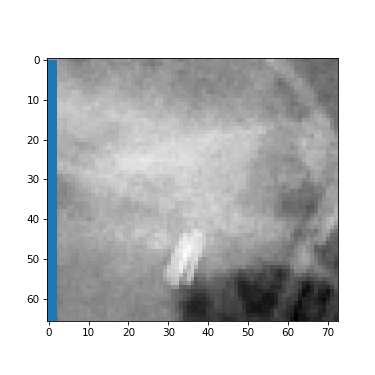

(array([3.455e+03, 2.969e+03, 2.961e+03, 2.387e+03, 2.990e+03, 3.522e+03,
        2.789e+03, 1.972e+03, 1.539e+03, 1.108e+03, 9.850e+02, 8.390e+02,
        9.200e+02, 8.530e+02, 8.690e+02, 9.220e+02, 9.840e+02, 9.930e+02,
        1.031e+03, 1.071e+03, 1.255e+03, 1.202e+03, 1.335e+03, 1.412e+03,
        1.592e+03, 1.835e+03, 1.862e+03, 2.141e+03, 2.182e+03, 2.248e+03,
        2.357e+03, 2.380e+03, 2.433e+03, 2.570e+03, 2.504e+03, 2.684e+03,
        2.679e+03, 2.814e+03, 2.777e+03, 2.970e+03, 3.013e+03, 3.145e+03,
        0.000e+00, 3.320e+03, 3.488e+03, 3.615e+03, 3.928e+03, 4.042e+03,
        4.177e+03, 4.408e+03, 4.334e+03, 4.363e+03, 4.550e+03, 4.525e+03,
        4.557e+03, 4.777e+03, 4.673e+03, 4.804e+03, 4.987e+03, 4.852e+03,
        4.824e+03, 4.876e+03, 4.877e+03, 4.940e+03, 5.113e+03, 5.074e+03,
        5.173e+03, 5.038e+03, 4.991e+03, 4.918e+03, 4.938e+03, 4.806e+03,
        4.755e+03, 4.764e+03, 4.647e+03, 4.530e+03, 4.712e+03, 4.671e+03,
        4.816e+03, 4.924e+03, 4.898e+0

In [12]:
plt.figure(figsize=(5,5))
plt.hist(new_img.ravel(), bins = 256)

Notice how the histogram has the same shape, but now it's centered around 0. This is a key step in image pre-processing when we prepare imaging data for machine learning. 

## Step 6: 
Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow

In [13]:
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


In [14]:
plt.imshow(dcm.pixel_array[535:(535+66),240:(240+73)],cmap='gray')

## Step 7: 
Plot a histogram of the normalized intensity values of the mass

<IPython.core.display.Javascript object>


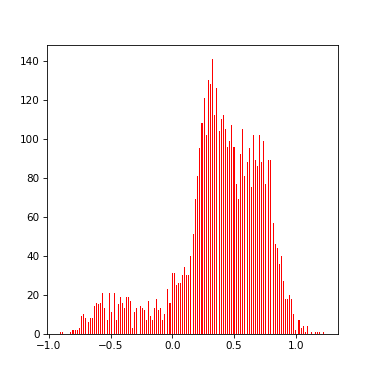

In [15]:
plt.figure(figsize=(5,5))
plt.hist(new_img[535:(535+66),240:(240+73)].ravel(), bins = 256,color='red')
plt.show()

What does this tell us? It tell us that the intensity values of the mass are higher than the image mean, but mostly fall within a single standard deviation of the image intensity values. This tell us that using some sort of thresholding mechanism to identify tumors in an image would probably _not_ be appropriate, because the mass's intensity values are not _that_ different from the rest of the image. 